# **Import Dependencies**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder


ImportError: cannot import name 'root_mean_squared_error' from 'sklearn.metrics' (c:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\__init__.py)

# **Project 1 - Linear Regression**

**Penjelasan Teoritis:**  
- Linear Regression adalah algoritma supervised learning yang digunakan untuk memprediksi nilai kontinu (misalnya, harga rumah, suhu, dll.).  
- Model ini mencoba menemukan hubungan linear antara fitur (independent variables) dan target (dependent variable).  
- Rumus umum:  

$$
y = mx + c
$$

Di mana:
- \( y \): Target (nilai yang diprediksi).
- \( x \): Fitur (input).
- \( m \): Koefisien (slope).
- \( c \): Intercept.  

**Contoh Aplikasi:**  
- Prediksi harga rumah berdasarkan luas, jumlah kamar, dan lokasi.  

**Visualisasi:**  
![Contoh Gambar](https://arjun-mota.github.io/assets/img/sample/linear_regression_diagram.png)  
Grafik scatter plot dengan garis regresi.

## **Load Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum Machine Learning 2024 2025/Minggu 2 - Modul 1/Dataset/dataset_insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Data Exploration**

In [ ]:
# cek apakah ada data yang hilang?
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dataset berisi informasi mengenai biaya asuransi kesehatan (charges) berdasarkan beberapa faktor:

* **age** (Usia): Variabel numerik, menunjukkan umur seseorang.
* **sex** (Jenis Kelamin): Kategorikal (male atau female).
* **bmi** (Body Mass Index): Variabel numerik, menunjukkan indeks massa tubuh.
* **children** (Jumlah Anak): Variabel numerik, menunjukkan jumlah anak tanggungan.
* **smoker** (Perokok atau Tidak): Kategorikal (yes atau no).
* **region** (Wilayah tempat tinggal): Kategorikal (southeast, southwest, northwest, northeast).
* **charges** (Biaya Asuransi): Variabel numerik yang menjadi target (variabel dependen)

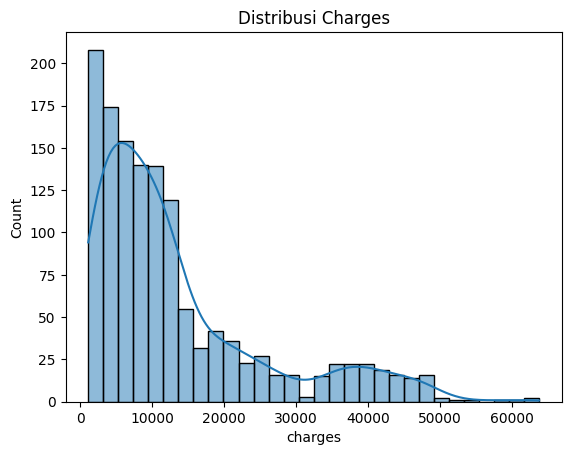

In [ ]:
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribusi Charges')
plt.show()

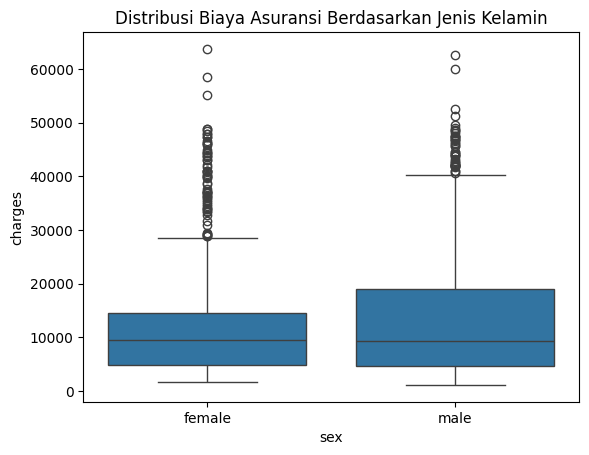

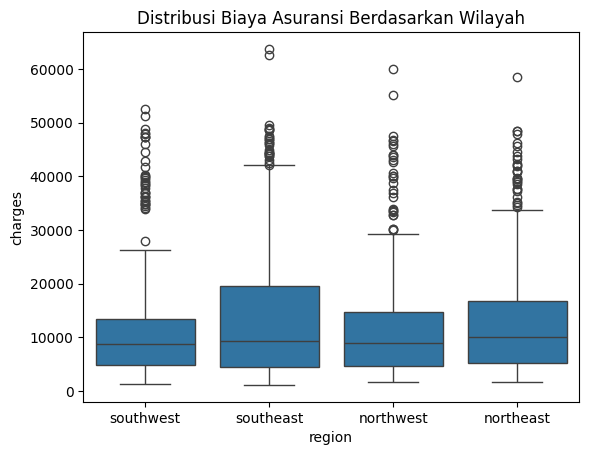

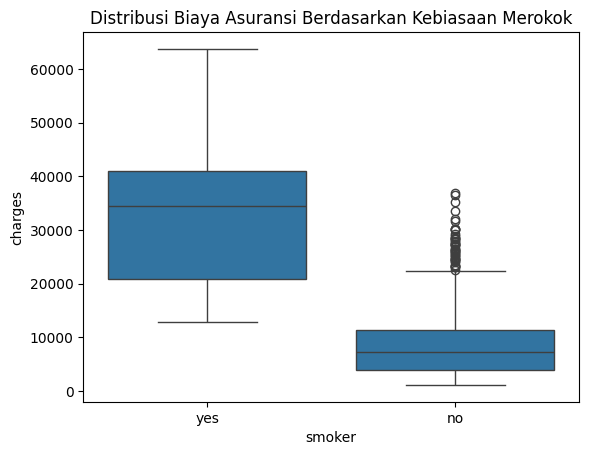

In [ ]:
sns.boxplot(x=df['sex'], y=df['charges'])
plt.title("Distribusi Biaya Asuransi Berdasarkan Jenis Kelamin")
plt.show()

sns.boxplot(x=df['region'], y=df['charges'])
plt.title("Distribusi Biaya Asuransi Berdasarkan Wilayah")
plt.show()

sns.boxplot(x=df['smoker'], y=df['charges'])
plt.title("Distribusi Biaya Asuransi Berdasarkan Kebiasaan Merokok")
plt.show()


**A. Perbedaan Biaya Asuransi antara Perokok dan Non-Perokok**
* Perokok (yes) memiliki biaya asuransi yang
jauh lebih tinggi dibandingkan non-perokok (no).
* Median biaya asuransi untuk perokok jauh lebih tinggi dibanding non-perokok.
* Rentang biaya asuransi untuk perokok juga lebih lebar, menunjukkan variasi biaya yang lebih besar.

**B. Persebaran Data**
* Perokok (yes):
  * Biaya asuransi berkisar antara sekitar 12.000 hingga 63.000.
  * Terdapat banyak individu dengan biaya tinggi di atas 40.000, menunjukkan banyak individu dengan risiko tinggi.
* Non-perokok (no):
  * Biaya asuransi berkisar di bawah 25.000, dengan mayoritas di sekitar 5.000 hingga 15.000.
  * Banyak outlier di atas 20.000, mungkin karena faktor lain seperti usia atau BMI.

## **Data Analysis**

Dalam membuat model machine learning diperlukan kemampuan analisis terhadap data yang ditemukan. Sebagai contoh kita bisa melihat **Faktor yang mungkin berpengaruh terhadap biaya asuransi**

1. Usia (age)
Orang yang lebih tua cenderung memiliki biaya asuransi yang lebih tinggi karena risiko kesehatan meningkat seiring bertambahnya usia.

2. BMI (bmi) BMI yang lebih tinggi (misalnya di atas 30, kategori obesitas) dapat meningkatkan biaya asuransi karena risiko kesehatan lebih besar (seperti hipertensi dan diabetes).

3. Jumlah Anak (children) Bisa jadi biaya asuransi meningkat seiring bertambahnya jumlah anak karena tanggungan keluarga bertambah.

4. Merokok (smoker) Dari data sampel, perokok (yes) memiliki biaya yang lebih tinggi dibandingkan non-perokok. Misalnya, orang pertama dalam data (index=0) memiliki biaya asuransi tinggi karena dia seorang perokok.

5. Jenis Kelamin (sex) Bisa dibandingkan apakah ada perbedaan biaya antara laki-laki dan perempuan.

6. Wilayah (region) Mungkin ada perbedaan biaya berdasarkan lokasi, misalnya biaya medis lebih tinggi di satu wilayah dibandingkan yang lain.


###  **Pertanyaan yang Bisa Diteliti Lebih Lanjut**
1. Apakah perokok memiliki biaya asuransi yang jauh lebih tinggi dibandingkan non-perokok?
1. Apakah usia memiliki hubungan linear terhadap biaya asuransi?
1. Apakah BMI tinggi meningkatkan biaya asuransi, terutama jika dikombinasikan dengan kebiasaan merokok?
1. Bagaimana perbedaan wilayah memengaruhi biaya?
1. Apakah laki-laki dan perempuan memiliki perbedaan biaya asuransi yang signifikan?



Dari hasil analisa tersebut sudah terlihat beberapa tren awal yaitu:
1. Perokok mungkin membayar lebih mahal untuk asuransi.
1. Usia yang lebih tua bisa berarti biaya yang lebih tinggi.
1. BMI yang tinggi mungkin berkontribusi pada kenaikan biaya.
1. Faktor-faktor lain seperti jumlah anak, jenis kelamin, dan wilayah juga bisa memengaruhi biaya.

## **Data Preprocessing**

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

In [ ]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


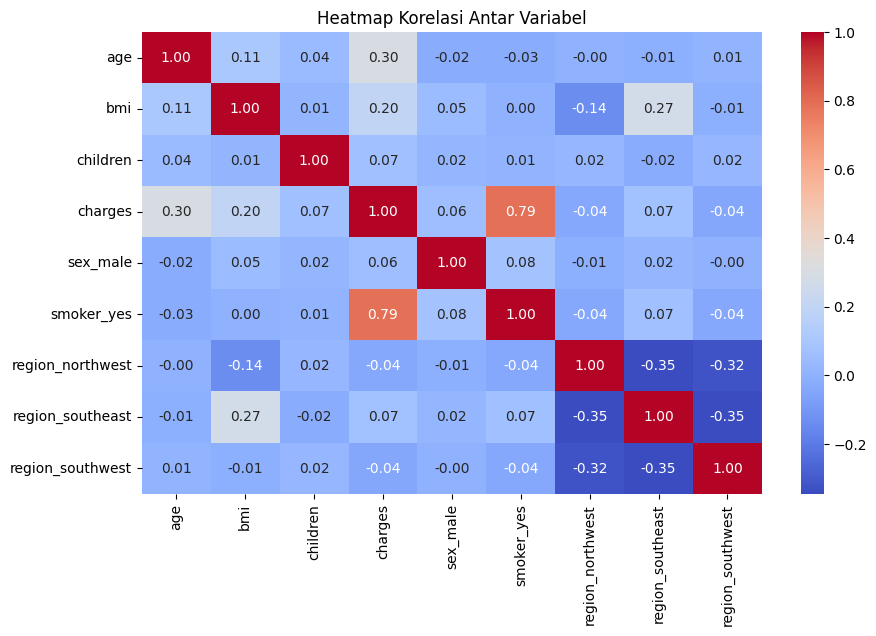

In [ ]:
correlation_matrix = df.corr()

# Visualisasi korelasi
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

> Heatmap membantu kita untuk dapat mengidentifikasi variabel mana yang paling berpengaruh terhadap target dalam hal ini adalah **charges**

**Faktor yang Paling Berpengaruh terhadap Biaya Asuransi**

1. smoker_yes (Kebiasaan Merokok) memiliki korelasi tertinggi dengan charges (0.79)
  * Artinya, perokok cenderung memiliki biaya asuransi yang jauh lebih tinggi dibandingkan non-perokok.
  *  Ini selaras dengan hasil boxplot sebelumnya yang menunjukkan bahwa perokok membayar premi yang lebih mahal.

2. age (Usia) memiliki korelasi 0.30 terhadap charges
  * Ini menunjukkan bahwa semakin tua seseorang, semakin besar biaya asuransi.
  * Meskipun korelasinya tidak sekuat smoker_yes, usia tetap berkontribusi terhadap kenaikan biaya asuransi.

3. bmi (Indeks Massa Tubuh) memiliki korelasi 0.20 terhadap charges
  * Artinya, BMI lebih tinggi bisa sedikit meningkatkan biaya asuransi, tetapi pengaruhnya lebih kecil dibandingkan kebiasaan merokok.

4. children (Jumlah Anak) memiliki korelasi rendah (0.07) terhadap charges
  * Ini berarti jumlah anak tidak terlalu berpengaruh terhadap biaya asuransi.

5. Jenis kelamin (sex_male) memiliki korelasi yang sangat kecil (0.06) terhadap charges
  * Artinya, tidak ada perbedaan signifikan antara laki-laki dan perempuan dalam biaya asuransi.



Dari hasil Heatmap kita akan menggunakan variabel yang memiliki korelasi tertinggi yaitu `'age', 'bmi', 'children', 'smoker_yes'`

In [ ]:
X = df[['age', 'bmi', 'children', 'smoker_yes']]  # Pilih variabel yang signifikan
y = df['charges']

> Bagi dataset menjadi data latih dan data uji sebesar 80% untuk data latih dan 20% untuk data uji

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Normalisasi Data

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Modelling**

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## **Evaluation**

In [ ]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 33981653.95019775
Root Mean Squared Error (RMSE): 5829.378521780666
R-squared (R²): 0.7811147722517887


**Penjelasan Hasil Evaluasi**
1. Nilai MSE menunjukan seberapa besar rata-rata kesalahan prediksi model. Nilainya cukup besar karena charges menggunakan skala yang besar (ribuan hingga puluhan ribu).
2. Nilai R Squared memiliki 78.1% variabilitas. Artinya model dapat menjelaskan 78.1% variansi data. Sisanya 21.9% dipengaruhi oleh faktor-faktor lain yang tidak dipertimbangkan dalam model.

# **Project 2 - Logistic Regression**

**Penjelasan Teoritis:**  
- Logistic Regression adalah algoritma supervised learning yang digunakan untuk masalah klasifikasi (misalnya, prediksi biner seperti lulus/tidak lulus).  
- Model ini memprediksi probabilitas suatu instance termasuk dalam kelas tertentu menggunakan fungsi sigmoid.  
- Rumus umum:  

$$
P(y=1) = \frac{1}{1 + e^{-(mx + c)}}
$$

Di mana:
- \( P(y=1) \): Probabilitas instance termasuk dalam kelas 1.
- \( x \): Fitur (input).
- \( m \): Koefisien (slope).
- \( c \): Intercept.


**Contoh Aplikasi:**  
- Prediksi kelulusan mahasiswa berdasarkan nilai ujian dan kehadiran.  

**Visualisasi:**  
![Contoh Gambar](https://miro.medium.com/max/1280/1*iKo3KI4kqkZ47W7pmmH4cw.png)
Grafik sigmoid yang menunjukkan probabilitas.  


## **Load Dataset**

In [ ]:
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
print("Contoh data:")
df.head()

Contoh data:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


target
- 0 : setosa
- 1 : versicolor
- 2 : virginica

In [ ]:
print("\nJumlah sampel per kelas:")
df['target'].value_counts()


Jumlah sampel per kelas:


,count
target,
0,50
1,50
2,50


## **Data Exploration**

In [ ]:
# Menampilkan struktur dataset
print(df.info())

# Menampilkan beberapa baris pertama untuk pemeriksaan data
print(df.head())

# Memeriksa apakah ada data yang hilang
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1     

In [ ]:
# Statistik deskriptif untuk fitur numerik
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


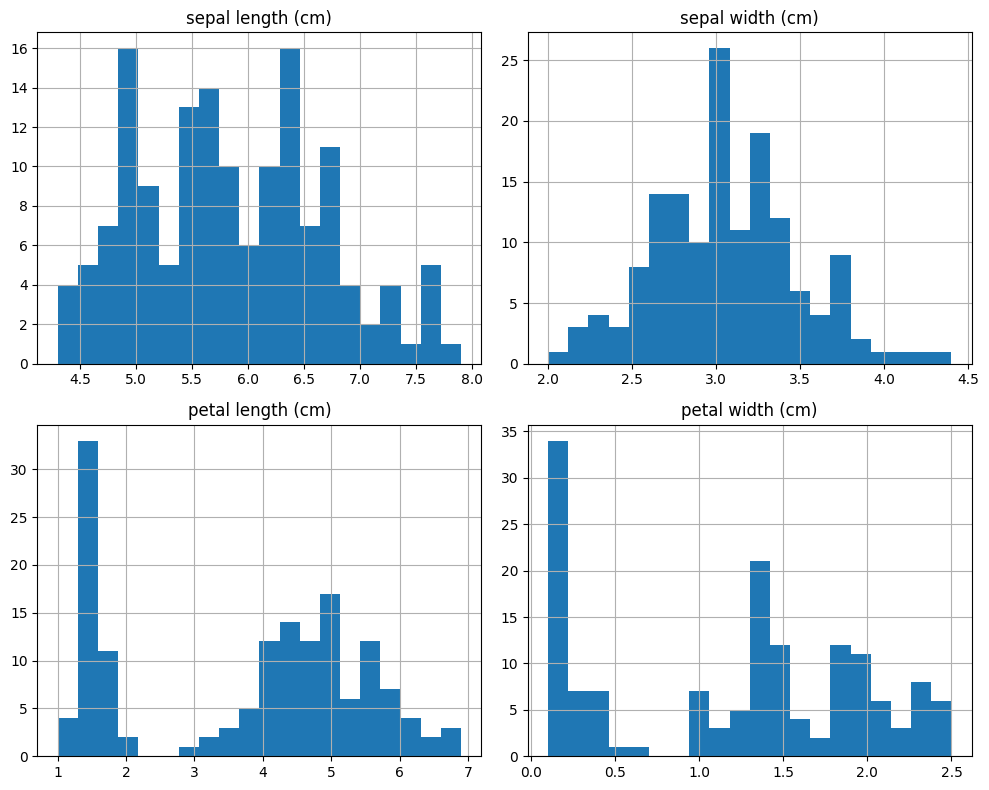

In [ ]:
# Histogram untuk setiap fitur
df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplot untuk masing-masing fitur
# sns.boxplot(x='target', y='sepal length (cm)', data=df)
plt.show()

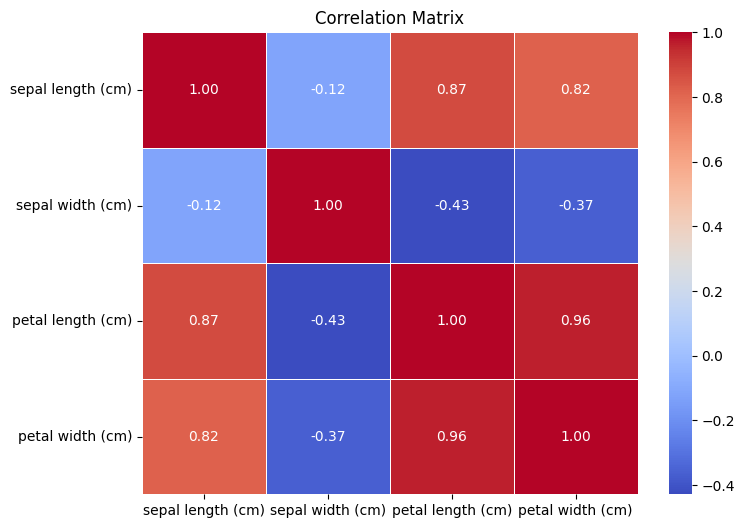

In [ ]:
# Menghitung korelasi antar fitur
correlation_matrix = df.drop(columns=['target']).corr()

# Menampilkan heatmap korelasi antar fitur
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


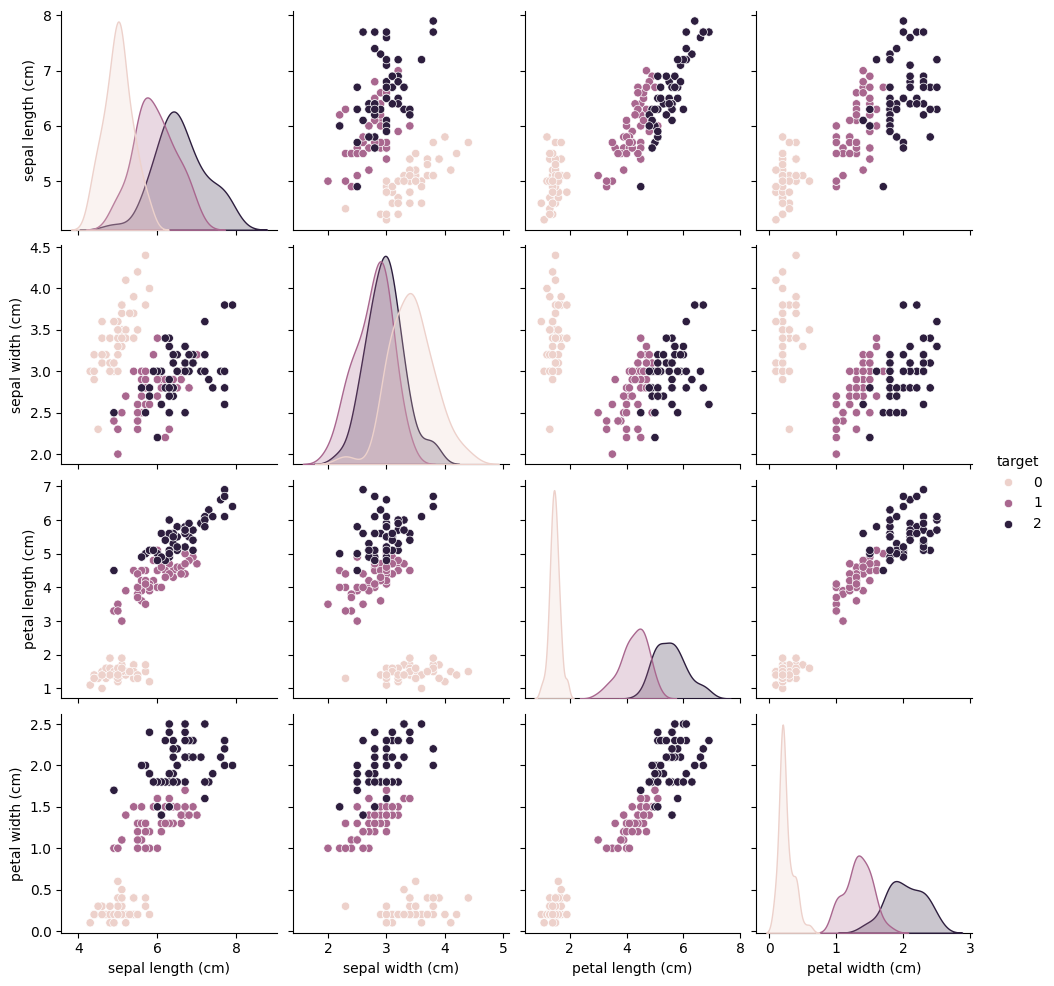

In [ ]:
# Pairplot untuk melihat hubungan antar fitur
sns.pairplot(df, hue='target')
plt.show()

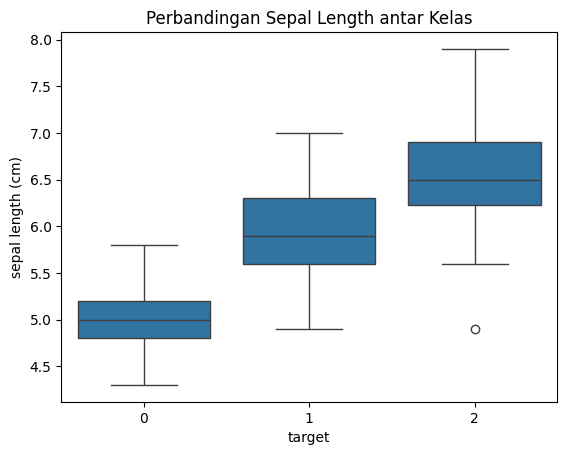

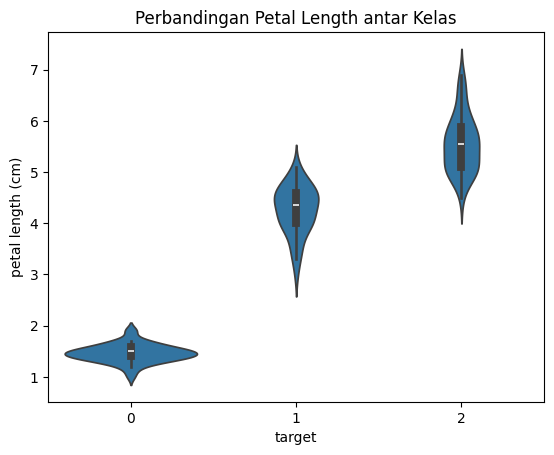

In [ ]:
# Boxplot per kelas target untuk sepal length
sns.boxplot(x='target', y='sepal length (cm)', data=df)
plt.title('Perbandingan Sepal Length antar Kelas')
plt.show()

# Violin plot untuk petal length
sns.violinplot(x='target', y='petal length (cm)', data=df)
plt.title('Perbandingan Petal Length antar Kelas')
plt.show()


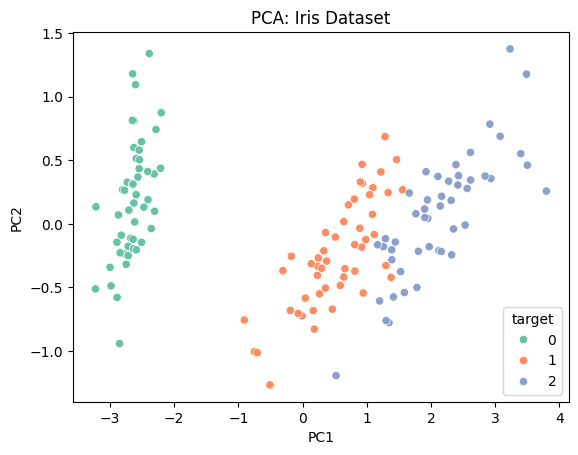

In [ ]:
from sklearn.decomposition import PCA

# Menggunakan PCA untuk mereduksi dimensi menjadi 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df.drop(columns=['target']))

# Membuat DataFrame untuk komponen utama
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['target'] = df['target']

# Visualisasi hasil PCA
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df_pca, palette='Set2')
plt.title('PCA: Iris Dataset')
plt.show()


## **Data Analysis**

**Dalam membuat model machine learning, diperlukan kemampuan analisis terhadap data yang ditemukan. Sebagai contoh, kita dapat melihat faktor-faktor yang mungkin berpengaruh terhadap kelas bunga Iris dalam dataset ini:**

**1. Sepal Length (Panjang Sepal)**
   - Panjang sepal cenderung berbeda antar spesies bunga. Berdasarkan data, bunga **Iris Setosa** memiliki panjang sepal yang lebih kecil dibandingkan dengan **Iris Versicolor** dan **Iris Virginica**, yang cenderung lebih panjang.
   - **Faktor Pengaruh:** Panjang sepal dapat digunakan sebagai indikator untuk membedakan spesies bunga, karena variasinya cukup signifikan antara spesies.

**2. Sepal Width (Lebar Sepal)**
   - Lebar sepal juga menunjukkan perbedaan yang signifikan antara spesies bunga. **Iris Setosa** cenderung memiliki lebar sepal yang lebih lebar dibandingkan dengan **Iris Versicolor** dan **Iris Virginica**, yang cenderung lebih sempit.
   - **Faktor Pengaruh:** Lebar sepal yang lebih besar bisa menjadi karakteristik spesifik untuk bunga **Iris Setosa**, sedangkan lebar sepal yang lebih kecil mungkin menunjukkan spesies lainnya.

**3. Petal Length (Panjang Petal)**
   - **Panjang petal** adalah salah satu fitur yang paling berbeda antar spesies. **Iris Virginica** memiliki panjang petal yang lebih panjang dibandingkan dengan **Iris Setosa** dan **Iris Versicolor**.
   - **Faktor Pengaruh:** Panjang petal dapat digunakan untuk membedakan spesies yang lebih mudah, karena ada perbedaan mencolok pada panjangnya.

**4. Petal Width (Lebar Petal)**
   - Seperti panjang petal, lebar petal juga memiliki variasi yang jelas antar spesies. **Iris Virginica** memiliki lebar petal yang lebih besar dibandingkan dengan **Iris Setosa** dan **Iris Versicolor**.
   - **Faktor Pengaruh:** Lebar petal yang lebih besar menunjukkan bahwa spesies **Iris Virginica** cenderung memiliki ukuran petal yang lebih lebar, yang dapat digunakan untuk klasifikasi.

**5. Target / Spesies (Setosa, Versicolor, Virginica)**
   - **Spesies** adalah target yang ingin diprediksi, dan jelas bahwa **Setosa** cenderung lebih kecil dan lebih mudah dibedakan dengan panjang dan lebar sepal serta petal yang lebih kecil dibandingkan dengan **Versicolor** dan **Virginica**.
   - **Faktor Pengaruh:** Penggunaan fitur seperti panjang dan lebar sepal/petal dapat sangat membantu dalam mengklasifikasikan spesies bunga Iris.

---

**Pertanyaan yang Bisa Diteliti Lebih Lanjut:**

1. **Apakah panjang dan lebar sepal dapat digunakan untuk membedakan spesies bunga Iris?**
   - Melihat perbedaan panjang dan lebar sepal antar spesies, kita bisa menguji seberapa baik model machine learning bisa menggunakan fitur ini untuk klasifikasi.

2. **Apakah panjang petal lebih signifikan dibandingkan dengan lebar petal dalam membedakan spesies bunga?**
   - Mengingat panjang petal memiliki variasi yang besar antar spesies, kita bisa melihat apakah panjang petal adalah fitur yang lebih kuat dibandingkan dengan lebar petal untuk klasifikasi.

3. **Apakah spesies bunga dapat dibedakan secara linier hanya dengan menggunakan satu fitur seperti panjang atau lebar sepal/petal?**
   - Kita dapat menganalisis hubungan antara panjang dan lebar sepal/petal dengan spesies dan memeriksa apakah ada hubungan linear yang jelas antara fitur dan target.

4. **Bagaimana hubungan antara panjang sepal dan panjang petal dalam membedakan spesies?**
   - Dengan menggunakan visualisasi scatter plot, kita bisa melihat apakah ada pola yang jelas antara panjang sepal dan panjang petal untuk setiap spesies.

5. **Apakah fitur sepal atau petal lebih berpengaruh terhadap klasifikasi spesies dibandingkan dengan fitur lainnya?**
   - Menggunakan teknik seperti **PCA** (Principal Component Analysis), kita bisa mereduksi dimensi data dan melihat apakah ada fitur yang lebih dominan dalam membedakan spesies.

---

**Tren Awal Berdasarkan Analisis:**

1. **Sepal dan Petal Panjang serta Lebar** menunjukkan perbedaan yang jelas antar spesies bunga. **Iris Setosa** memiliki ukuran yang lebih kecil pada hampir semua fitur, sedangkan **Iris Virginica** cenderung memiliki ukuran yang lebih besar.
2. **Panjang dan lebar petal** tampaknya menjadi fitur yang sangat berguna dalam membedakan spesies, khususnya dalam membedakan **Iris Setosa** dengan dua spesies lainnya.
3. **Iris Setosa** cenderung memiliki ukuran yang lebih kecil untuk hampir semua fitur (sepal dan petal), sedangkan **Iris Virginica** memiliki ukuran yang lebih besar.
4. Data yang ada memungkinkan kita untuk **membedakan spesies bunga** hanya dengan menggunakan fitur-fitur seperti panjang dan lebar sepal serta petal.

---

**Kesimpulan:**
1. **Panjang dan lebar petal** adalah fitur utama dalam membedakan spesies, dengan **Iris Setosa** yang memiliki ukuran paling kecil.
2. **Panjang sepal** dan **lebar sepal** juga memiliki peran penting dalam klasifikasi, meskipun perbedaannya tidak sebesar pada fitur petal.
3. **Iris Setosa** dapat dengan mudah dibedakan karena ukurannya yang lebih kecil pada semua fitur.
4. Spesies lainnya (**Iris Versicolor** dan **Iris Virginica**) memiliki fitur yang lebih mirip, sehingga mungkin memerlukan pemodelan yang lebih kompleks untuk membedakannya.

## **Data Preprocessing**

In [ ]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Modelling**

In [ ]:
# Train classifier with regularization
log_reg = LogisticRegression(C=0.1)  # Regularisasi lebih kuat
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)

## **Evaluation**

In [ ]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression:
Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


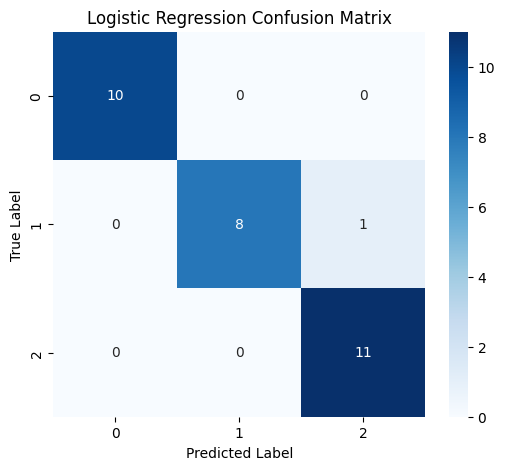

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Interpretasi**: <br>
Tampak dari hasil confussion matrix dan hasil evaluasi bahwa model tersebut mengalami gejala Overfitting, di mana model memiliki tingkat error yang terlalu rendah. Oleh karenanya diperlukan suatu langkah untuk megatasinya, di antaranya adal dengan menggunakan metode <i><b> cross validation </b></i> dan mengurangi dimensi fiturnya dengan <i><b> PCA </b></i>

**Cross-Validation** membantu menghindari overfitting dengan mengevaluasi model pada beberapa subset data.

In [ ]:
scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation scores: [0.79166667 1.         0.83333333 0.95833333 0.91666667]
Mean CV Accuracy: 0.9


**Mengurangi Dimensi dengan PCA** Jika fitur terlalu banyak atau berkorelasi tinggi, PCA dapat membantu mengurangi dimensi fitur.

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

log_reg.fit(X_train_pca, y_train)
y_pred_pca = log_reg.predict(X_test_pca)

print("Accuracy after PCA:", accuracy_score(y_test, y_pred_pca))

Accuracy after PCA: 0.9333333333333333


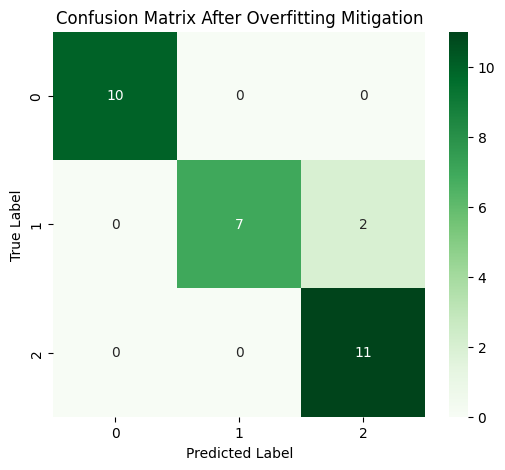

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_pca), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix After Overfitting Mitigation")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**Kesimpulan** </br></br>
Dari hasil evaluasi, kita bisa melihat performa model dalam mengklasifikasikan spesies iris. Dengan menerapkan regularisasi, cross-validation, dan PCA, model lebih mampu menghindari overfitting dan memiliki generalisasi yang lebih baik terhadap data baru.

## 12. Mengatasi Overfitting
Jika model mengalami overfitting, beberapa pendekatan yang bisa dilakukan:

### a. Regularisasi (L1/L2)
Logistic Regression secara default menggunakan regularisasi L2. Kita bisa mengatur parameter **C** untuk menyesuaikan tingkat regularisasi.
```python
log_reg = LogisticRegression(C=0.1)  # Regularisasi lebih kuat
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
```

### b. Menggunakan Cross-Validation
Cross-validation membantu menghindari overfitting dengan mengevaluasi model pada beberapa subset data.
```python
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())
```

### c. Mengurangi Dimensi dengan PCA
Jika fitur terlalu banyak atau berkorelasi tinggi, PCA dapat membantu mengurangi dimensi fitur.
```python
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
log_reg.fit(X_train_pca, y_train)
y_pred_pca = log_reg.predict(X_test_pca)
```

Dengan menerapkan metode di atas, model dapat lebih generalisasi terhadap data baru dan menghindari overfitting.

---

# **Learning by Doing**

Silahkan coba sendiri dan bereksperimen untuk **Linear Regression** serta **Logistic Regression** menggunakan dataset yang sudah disediakan (***diberikan di grup***).

Linear Regression   : Prediksi harga rumah (median_house_value) <br>
Logistic Regression : Klasifikasi suara (label)

**Untuk Linear Regression:**  
1. Coba tambahkan fitur baru (misalnya, usia properti) dan lihat apakah performa model meningkat.  
2. Bandingkan hasilnya dengan algoritma lain (misalnya, Decision Tree Regression).  

**Untuk Logistic Regression:**  
1. Coba ubah threshold klasifikasi (misalnya, dari 0.5 menjadi 0.6) dan lihat pengaruhnya terhadap akurasi.  
2. Bandingkan hasilnya dengan algoritma lain (misalnya, KNN).

- Linar regression    

In [2]:
file_path = 'dataset_insurance.csv'
data = pd.read_csv(file_path)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
from sklearn.preprocessing import LabelEncoder

data_preprocessed = data.copy()

label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    le = LabelEncoder()
    data_preprocessed[col] = le.fit_transform(data_preprocessed[col])
    label_encoders[col] = le  

data_preprocessed.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data_preprocessed['age_squared'] = data_preprocessed['age'] ** 2

X = data_preprocessed.drop(columns=['charges'])
y = data_preprocessed['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2  

(33198602.119030107, 0.786158625580852)

- Logistic regression

In [10]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mse_tree, r2_tree 


(45976071.59522642, 0.7038554121927711)

In [12]:
from sklearn.linear_model import LogisticRegression

data_preprocessed['charges_label'] = (data_preprocessed['charges'] > 15000).astype(int)

X_log = data_preprocessed.drop(columns=['charges', 'charges_label'])
y_log = data_preprocessed['charges_label']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_log, y_train_log)

y_pred_log = log_reg.predict(X_test_log)
accuracy_log = log_reg.score(X_test_log, y_test_log)

accuracy_log 


0.9402985074626866

In [13]:
from sklearn.metrics import accuracy_score

y_prob_log = log_reg.predict_proba(X_test_log)[:, 1]

y_pred_log_threshold = (y_prob_log >= 0.6).astype(int)

accuracy_log_threshold = accuracy_score(y_test_log, y_pred_log_threshold)

accuracy_log_threshold 


0.9402985074626866

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_log, y_train_log)

y_pred_knn = knn.predict(X_test_log)
accuracy_knn = accuracy_score(y_test_log, y_pred_knn)

accuracy_knn  


0.7126865671641791

# **Reflection**

NIM     :   105222007
NAMA    :   BAMBANG ISTIJAB

1. **Mengapa overfitting merupakan masalah dalam machine learning?**
   - **Jelaskan bagaimana overfitting dapat mempengaruhi performa model ketika diterapkan pada data baru yang belum pernah dilihat sebelumnya. Apa perbedaan antara performa model pada data latih dan data uji dalam kasus overfitting?**

- karena mengurangi kemampuan model untuk menyamakan pola di data baru
- overfitting membuat model terlalu fokus mengafal detail dari data yg dilatih, termasuk hal-hal yang tidak penting (seperti noise). Jadi, ketika menemukan data baru, model malah bingung karena tidak menemukan pola yang sama persis. Akibatnya, performa model bagus di data latih tapi jelek di data uji karena tidak bisa membedakan mana pola yang penting dan mana yang cuma kebetulan saja
- performa model di data latih biasanya lebih bagus karena model menghafal semua detail. Tapi di data uji, performanya kurang bagus karena model tidak mengerti pola yang bener buat data baru.
   

2. **Bagaimana regularisasi dapat membantu mengatasi overfitting dalam model Logistic Regression?**
   - **Jelaskan bagaimana teknik regularisasi seperti L1 (Lasso) dan L2 (Ridge) bekerja dalam mengurangi kompleksitas model. Bagaimana parameter C pada model Logistic Regression mempengaruhi tingkat regularisasi, dan apa dampaknya terhadap bias-variance tradeoff?**
   
- Regularisasi membantu ngatasi overfitting di logistic regression dengan membantasi bobot (koefisien) agar tidak terlalu besar atau terlalu banyak fitur yang berpengaruh
- L1 dan L2
   - L1 : membuat beberapa bobot menjadi nol agar model lebih simple
   - L2 : pengecilan model yang besar agar model tidak terlalu fokus ke fitur tertentu
- Param C
   - C besar : regulasi lemah, dampaknya membuat model lebih bebas 
   - C kecil : regulasi kuat, dampaknya model lebih ketat

3. **Apa dampak normalisasi fitur terhadap performa model klasifikasi?**
   - **Diskusikan bagaimana normalisasi atau standarisasi fitur, menggunakan metode seperti `StandardScaler`, memengaruhi kinerja model seperti Logistic Regression. Apa yang terjadi pada performa model jika fitur memiliki skala yang sangat berbeda satu sama lain sebelum normalisasi?**
   
- dampaknya membuat fitur mempunya skala yang sama
- Normalisasi atau standarisasi menggunakan StandardScaler membantu model seperti Logistic Regression membuat kerja lebih optimal, performa bisa turun dan model berat sebelah

4. **Mengapa cross-validation sangat penting dalam evaluasi model machine learning?**
   - **Jelaskan manfaat utama dari menggunakan teknik cross-validation dalam menilai kemampuan generalisasi model. Bagaimana cross-validation membantu menghindari bias dalam evaluasi model yang mungkin terjadi karena pembagian data yang tidak representatif?**
   
- Cross-validation penting untuk ngecek performa model secara lebih adil dan akurat.
- Cross-validation punya manfaat utama untuk ngetes kemampuan generalisasi model. Teknik ini membuar evaluasi jadi lebih akurat karena nguji model di berbagai bagian data. Cross-validation membantu nmenghindari bias dalam evaluasi model dengan cara ngeganti-ganti bagian data latih dan data uji secara bergantian. 

5. **Bagaimana Principal Component Analysis (PCA) dapat membantu mengurangi risiko overfitting dalam model?**
   - **Jelaskan bagaimana PCA mengurangi dimensi fitur dengan mengidentifikasi komponen utama yang mempertahankan sebagian besar variansi data. Bagaimana pengurangan dimensi ini dapat mencegah model menjadi terlalu kompleks dan mengurangi risiko overfitting? Apa dampaknya terhadap kinerja model setelah menggunakan PCA?**
   
- Principal Component Analysis (PCA) bisa bantu ngurangin risiko overfitting dengan cara nyederhanain fitur tanpa ngilangin informasi penting. 
- PCA (Principal Component Analysis) mengurangi dimensi fitur dengan cara mencari komponen utama yang bisa menampung sebagian besar variansi data. Pengurangan dimensi menggunakan PCA bisa mencegah model jadi terlalu kompleks dan ngurangin risiko overfitting, salah satunya karena mengilangkan fitur yang tidak penting, dampaknya performa naik 